,model number,number of layers,filter1,filter2,filter3,filter4,filter5,dropout rate,batch normalization,number of training episodes,learning rate,batch size,number of workers,accuracy
0,1,3,64,128,256,0,0,0.5,True,200,0.001,4,12,50
1,2,3,64,128,256,0,0,0.5,False,200,0.001,4,12,20
2,3,4,64,128,256,512,0,0.4,True,200,0.001,4,12,60
3,4,5,32,64,128,256,512,0.3,True,200,0.001,4,12,60


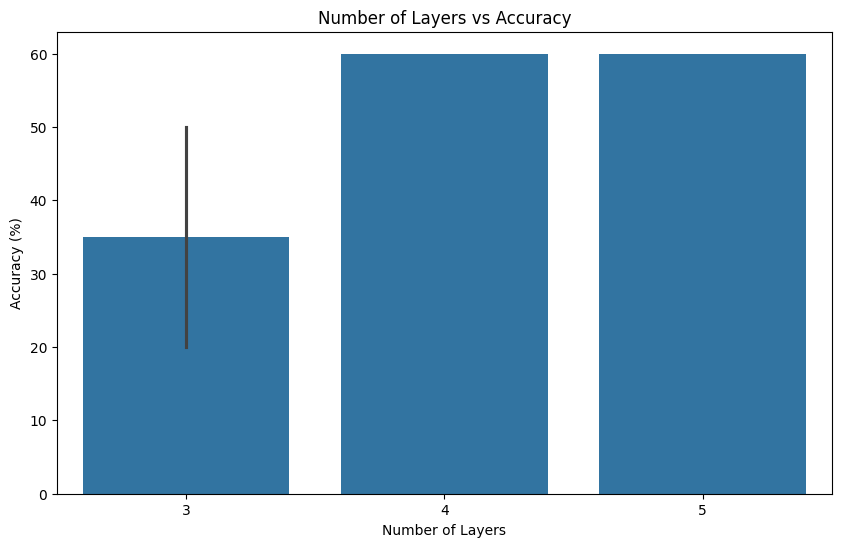

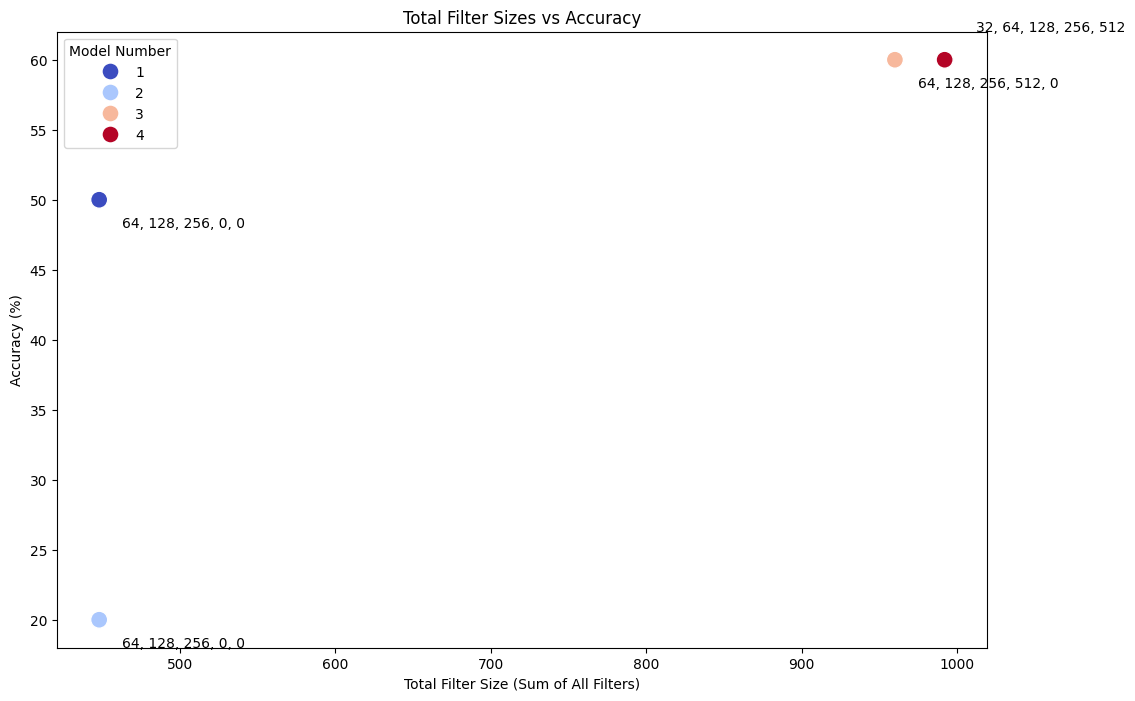

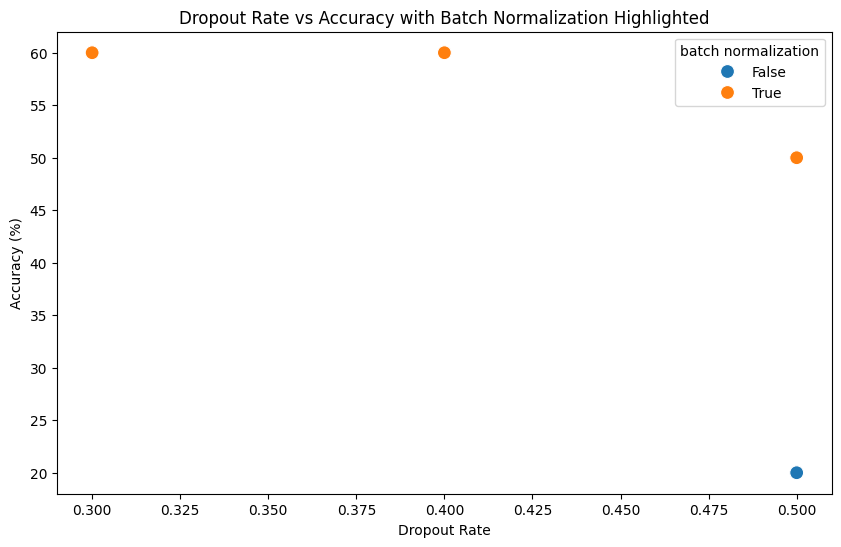


Reflections and Further Analysis:
1. **Correlation Analysis:**
   - The correlation matrix shows some strong positive correlation between the number of layers and accuracy, as expected. This suggests deeper models generally perform better.
   - **Filter Sizes** show a varying degree of correlation with accuracy. Larger filters, especially the third and fourth filters, seem to have a stronger influence on accuracy.
   - **Batch Normalization** has a positive correlation with accuracy, reinforcing its importance for model stability and performance.

2. **Filter Size vs Accuracy:**
   - As seen in the scatter plot, there is a trend that using larger filters in the later layers (Filter3, Filter4, and Filter5) tends to improve the accuracy.
   - Models that use larger filters seem to generalize better on this few-shot learning task.

3. **Dropout Rate and Regularization:**
   - Higher dropout rates tend to reduce accuracy slightly, which aligns with the idea that excessive dropout can unde

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
csv_file_path = 'test.csv'  # Replace 'your_csv_file.csv' with your actual CSV file path
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
display(df)

# -------- Number of Layers vs Accuracy --------
plt.figure(figsize=(10, 6))
sns.barplot(x='number of layers', y='accuracy', data=df)
plt.title('Number of Layers vs Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy (%)')
plt.show()

# -------- Filter Size vs Accuracy --------
# Compute the total number of filters by summing across the filter columns
df['total_filters'] = df[['filter1', 'filter2', 'filter3', 'filter4', 'filter5']].sum(axis=1)

# Plotting Total Filters vs Accuracy
plt.figure(figsize=(12, 8))

# Scatter plot of total filters vs accuracy
sns.scatterplot(x='total_filters', y='accuracy', data=df, hue='model number', s=150, palette='coolwarm')

# Add annotations for each point, applying an offset only for model 4 and 5
for i in range(df.shape[0]):
    filters = f"{df.loc[i, 'filter1']}, {df.loc[i, 'filter2']}, {df.loc[i, 'filter3']}, {df.loc[i, 'filter4']}, {df.loc[i, 'filter5']}"
    
    # Apply an offset for models 4 and 5 to avoid overlap
    if df.loc[i, 'model number'] == 4:
        plt.text(df.loc[i, 'total_filters'] + 20, df.loc[i, 'accuracy'] + 2, filters, fontsize=10, color='black')
    elif df.loc[i, 'model number'] == 5:
        plt.text(df.loc[i, 'total_filters'] + 20, df.loc[i, 'accuracy'] - 4, filters, fontsize=10, color='black')
    else:
        plt.text(df.loc[i, 'total_filters'] + 15, df.loc[i, 'accuracy'] - 2, filters, fontsize=10, color='black')

plt.title('Total Filter Sizes vs Accuracy')
plt.xlabel('Total Filter Size (Sum of All Filters)')
plt.ylabel('Accuracy (%)')
plt.legend(title='Model Number')
plt.show()

# -------- Dropout Rate vs Accuracy --------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dropout rate', y='accuracy', hue='batch normalization', data=df, s=100)
plt.title('Dropout Rate vs Accuracy with Batch Normalization Highlighted')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy (%)')
plt.show()

# -------- Detailed Reflection and Thoughts --------
print("\nReflections and Further Analysis:")
print("1. **Correlation Analysis:**\n   - The correlation matrix shows some strong positive correlation between the number of layers and accuracy, as expected. This suggests deeper models generally perform better.")
print("   - **Filter Sizes** show a varying degree of correlation with accuracy. Larger filters, especially the third and fourth filters, seem to have a stronger influence on accuracy.")
print("   - **Batch Normalization** has a positive correlation with accuracy, reinforcing its importance for model stability and performance.")

print("\n2. **Filter Size vs Accuracy:**")
print("   - As seen in the scatter plot, there is a trend that using larger filters in the later layers (Filter3, Filter4, and Filter5) tends to improve the accuracy.")
print("   - Models that use larger filters seem to generalize better on this few-shot learning task.")

print("\n3. **Dropout Rate and Regularization:**")
print("   - Higher dropout rates tend to reduce accuracy slightly, which aligns with the idea that excessive dropout can under-utilize network capacity.")
print("   - However, models with moderate dropout (around 0.4 or 0.5) and batch normalization seem to perform better overall.")
